# <center>Laboratorium 7<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [66]:
import main
import numpy as np
import scipy
from scipy.interpolate import splprep, splev
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """

    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y


def PolyCoefficients_cubic(x,coeffs, x_value, y_value):
    o = len(coeffs)
    y = y_value
    for i in range(o):
        y += coeffs[i]*(x-x_value)**(i+1)
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b=y-a*x_0$

***Przykład***


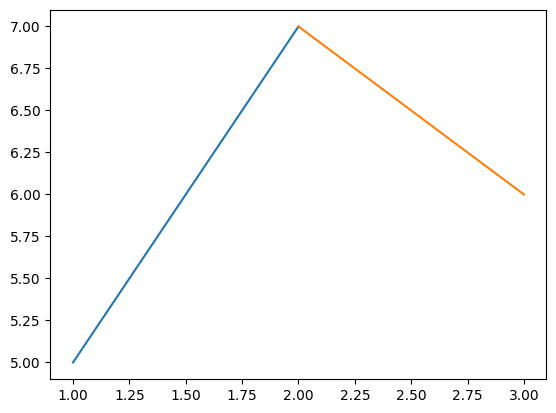

In [67]:
x_nodes=np.array([1,2,3])
y_nodes=np.array([5,7,6])

a,b=main.first_spline(x_nodes,y_nodes)
coeffs = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x_nodes)-1):
    x_between = np.linspace(x_nodes[i], x_nodes[i+1],1000)
    plt.plot(x_between, PolyCoefficients(x_between, coeffs[i]))

***Wnioski:***

W pierwszym zadaniu zaimplementowałam funkcję *first_spline*, która umożliwia przeprowadzanie interpolacji sklejanymi funkcjami pierwszego stopnia. Funkcja zwraca wektory współczynników *a, b* dla funkcji postaci *y = ax + b*.

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


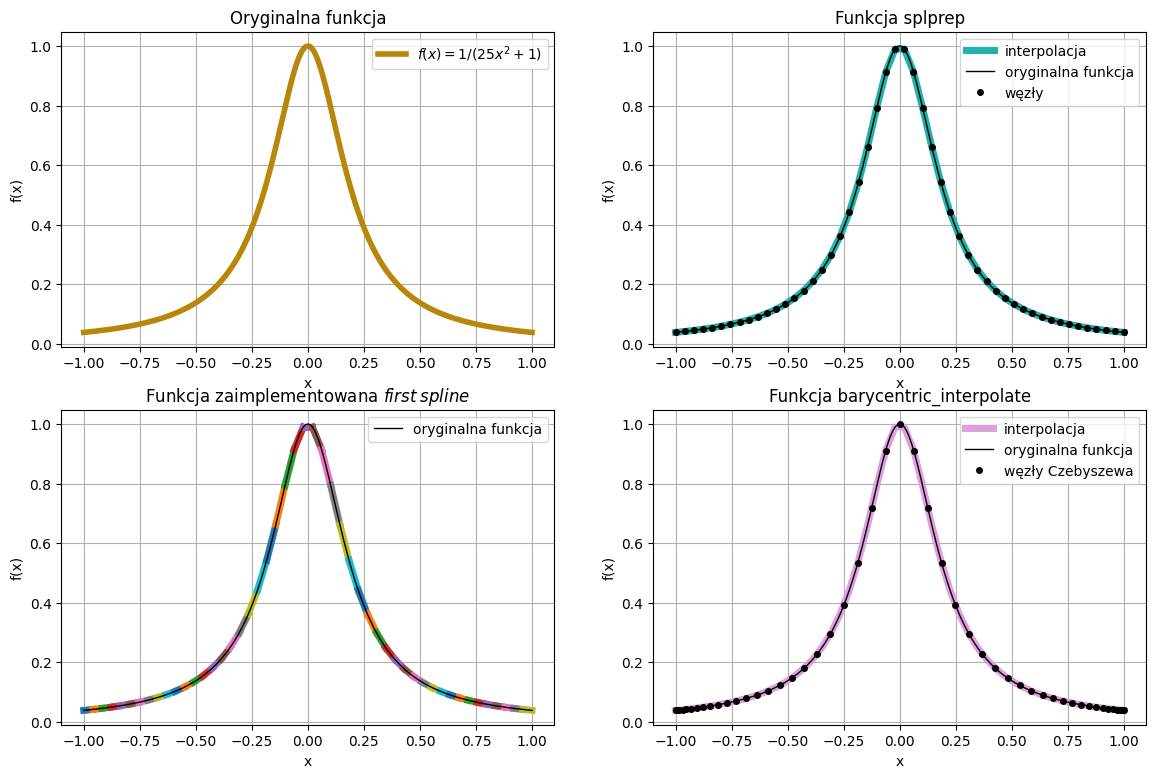

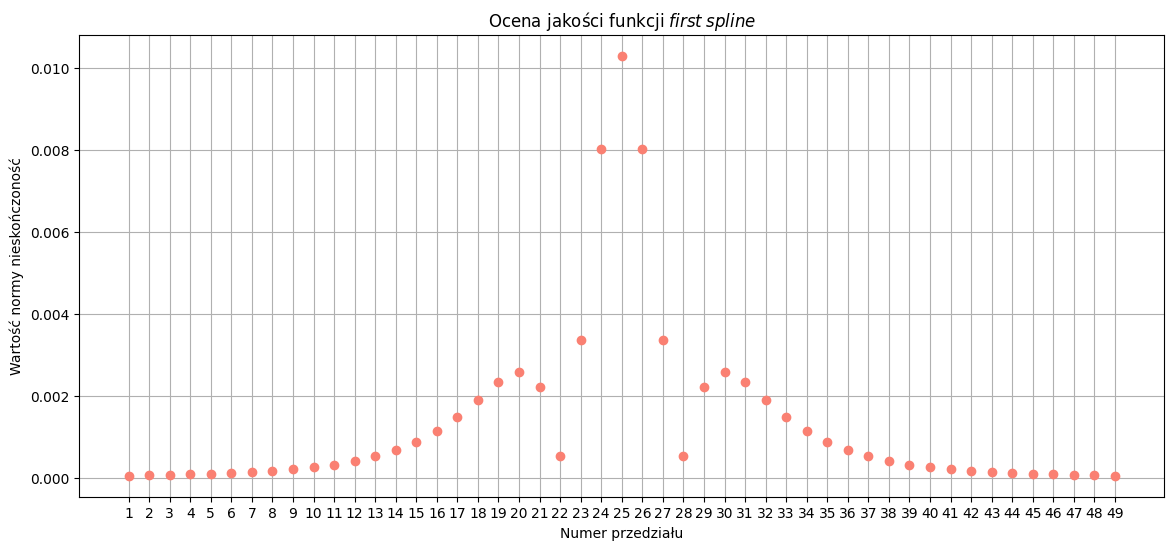

In [68]:
# funkcja oryginalna
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize= (14, 9))
fun = lambda x : 1/(25*x**2 + 1)
x = np.linspace(-1, 1, 1000)
y = fun(x)
ax1.plot(x, y,label= '$f(x) = 1/(25x^2+1)$', color= 'darkgoldenrod', linewidth= 4)
ax1.set(title= 'Oryginalna funkcja', xlabel= 'x', ylabel= 'f(x)')
ax1.legend()
ax1.grid()


# funkcja splprep
x_nodes1 = np.linspace(-1, 1, 50)
y_nodes1 = fun(x_nodes1)

tck, u = splprep([x_nodes1, y_nodes1], s= 0, k=1)
x_between1, y_between1 = splev(u, tck)
ax2.plot(x_between1, y_between1, color= 'lightseagreen', label= 'interpolacja', linewidth= 5)
ax2.plot(x, y,label= 'oryginalna funkcja', color= 'black', linewidth= 1)
ax2.plot(x_nodes1, y_nodes1,'.', markersize= 8,color= 'black', label= 'węzły')
ax2.set(title= 'Funkcja splprep', xlabel= 'x', ylabel= 'f(x)')
ax2.legend()
ax2.grid()


# zaimplementowana funkcja
x_nodes2 = np.linspace(-1, 1, 50)
y_nodes2 = fun(x_nodes2)

a,b=main.first_spline(x_nodes2,y_nodes2)
coeffs = [[b[i],a[i]] for i in range(len(a))]

norms_between2 = []
for i in range(len(x_nodes2)-1):
    x_between2 = np.linspace(x_nodes2[i], x_nodes2[i+1],1000)
    y_between2 = PolyCoefficients(x_between2, coeffs[i])
    ax3.plot(x_between2, y_between2, linewidth= 5)
    norms_between2.append(main.L_inf(fun(x_between2),y_between2))
ax3.plot(x, y,label= 'oryginalna funkcja', color= 'black', linewidth= 1)
ax3.set(title= 'Funkcja zaimplementowana $first_ spline$', xlabel= 'x', ylabel= 'f(x)')
ax3.grid()
ax3.legend()


# funkcja barycentric
x3 = np.linspace(-1, 1, 50)
interpolation_nodes_number = 50
x_nodes3 = main.chebyshev_nodes(interpolation_nodes_number)
y_values3 = barycentric_interpolate(x_nodes3, fun(x_nodes3), x3)
ax4.plot(x3, y_values3, color= 'plum', linewidth=5, label= 'interpolacja')
ax4.plot(x, y,label= 'oryginalna funkcja', color= 'black', linewidth= 1)
ax4.plot(x_nodes3, fun(x_nodes3), '.',markersize= 8, color= 'black', label= 'węzły Czebyszewa')
ax4.set(title= 'Funkcja barycentric_interpolate', xlabel= 'x', ylabel= 'f(x)')
ax4.legend()
ax4.grid()

# ocena jakości
intervals = [str(el) for el in range(1, 50)]
_, ax = plt.subplots(figsize= (14, 6))
ax.plot(intervals, norms_between2, 'o', color= 'salmon')
ax.set(title= 'Ocena jakości funkcji $first_ spline$', xlabel= 'Numer przedziału', ylabel= 'Wartość normy nieskończoność')
ax.grid()





***Wnioski:***

W drugim zadaniu przeprowadziłam interpolację zadanej funkcji na 3 różne sposoby. Każdy ze sposobów okazał się skuteczny i dał dobre przybliżenie funkcji. Dodatkowo, dokonałam analizy jakości funkcji zaimplementowanej w pierwszym zadaniu. Obliczyłam normy błędu wartości na poszczególnych odcinkach obliczonych z wykorzystaniem funkcji *PolyCoefficients* w stosunku do faktycznych wartości funkcji. Rząd największego błędu wyniósł ${10}^{-2}$.

***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


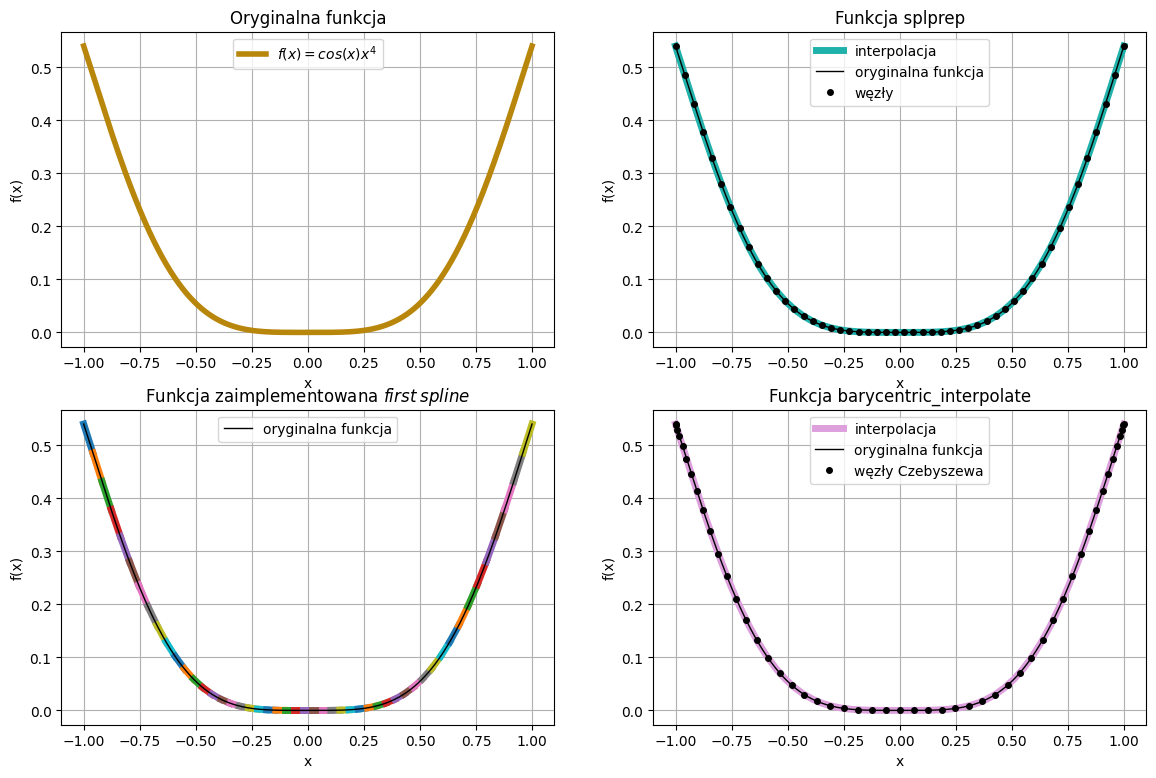

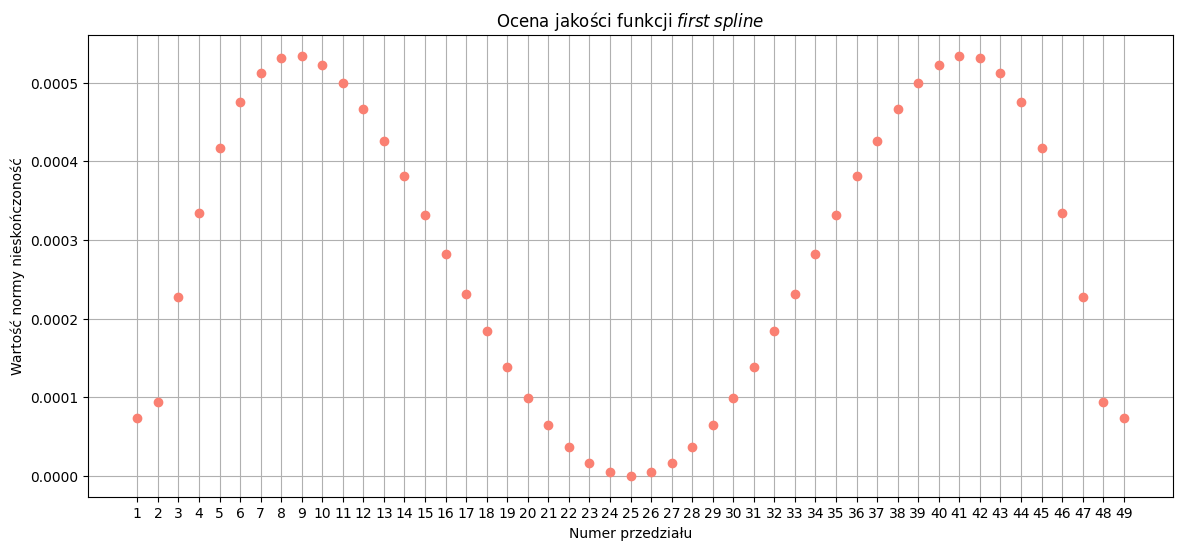

In [75]:
# funkcja oryginalna
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize= (14, 9))
fun = lambda x : np.cos(x)*x**4
x = np.linspace(-1, 1, 1000)
y = fun(x)
ax1.plot(x, y,label= '$f(x) = cos(x)x^4$', color= 'darkgoldenrod', linewidth= 4)
ax1.set(title= 'Oryginalna funkcja', xlabel= 'x', ylabel= 'f(x)')
ax1.legend()
ax1.grid()


# funkcja splprep
x_nodes1 = np.linspace(-1, 1, 50)
y_nodes1 = fun(x_nodes1)

tck, u = splprep([x_nodes1, y_nodes1], s= 0, k=1)
x_between1, y_between1 = splev(u, tck)
ax2.plot(x_between1, y_between1, color= 'lightseagreen', label= 'interpolacja', linewidth= 5)
ax2.plot(x, y,label= 'oryginalna funkcja', color= 'black', linewidth= 1)
ax2.plot(x_nodes1, y_nodes1,'.', markersize= 8,color= 'black', label= 'węzły')
ax2.set(title= 'Funkcja splprep', xlabel= 'x', ylabel= 'f(x)')
ax2.legend()
ax2.grid()


# zaimplementowana funkcja
x_nodes2 = np.linspace(-1, 1, 50)
y_nodes2 = fun(x_nodes2)

a,b=main.first_spline(x_nodes2,y_nodes2)
coeffs = [[b[i],a[i]] for i in range(len(a))]

norms_between2 = []
for i in range(len(x_nodes2)-1):
    x_between2 = np.linspace(x_nodes2[i], x_nodes2[i+1],1000)
    y_between2 = PolyCoefficients(x_between2, coeffs[i])
    ax3.plot(x_between2, y_between2, linewidth= 5)
    norms_between2.append(main.L_inf(fun(x_between2),y_between2))
ax3.plot(x, y,label= 'oryginalna funkcja', color= 'black', linewidth= 1)
ax3.set(title= 'Funkcja zaimplementowana $first_ spline$', xlabel= 'x', ylabel= 'f(x)')
ax3.grid()
ax3.legend()


# funkcja barycentric
x3 = np.linspace(-1, 1, 50)
interpolation_nodes_number = 50
x_nodes3 = main.chebyshev_nodes(interpolation_nodes_number)
y_values3 = barycentric_interpolate(x_nodes3, fun(x_nodes3), x3)
ax4.plot(x3, y_values3, color= 'plum', linewidth=5, label= 'interpolacja')
ax4.plot(x, y,label= 'oryginalna funkcja', color= 'black', linewidth= 1)
ax4.plot(x_nodes3, fun(x_nodes3), '.',markersize= 8, color= 'black', label= 'węzły Czebyszewa')
ax4.set(title= 'Funkcja barycentric_interpolate', xlabel= 'x', ylabel= 'f(x)')
ax4.legend()
ax4.grid()

# ocena jakości
intervals = [str(el) for el in range(1, 50)]
_, ax = plt.subplots(figsize= (14, 6))
ax.plot(intervals, norms_between2, 'o', color= 'salmon')
ax.set(title= 'Ocena jakości funkcji $first_ spline$', xlabel= 'Numer przedziału', ylabel= 'Wartość normy nieskończoność')
ax.grid()


***Wnioski:***

W zadaniu trzecim powtórzyłam schemat działania z zadania drugiego dla innej funkcji. Tym razem wykres oceny jakości prezentuje się zupełnie inaczej. Maksymalny błąd jest dwa razy mniejszy niż w poprzednim przypadku. Na podstawie dwóch wykresów błędów można zauważyć, że błąd zwiększa się tym bardziej, im mocniejsze jest "ugięcie" funkcji.

***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

https://medium.com/eatpredlove/natural-cubic-splines-implementation-with-python-edf68feb57aa



***Wnioski:***

W tym zadaniu zaimplementowałam funkcję służącą do przeprowadzania interpolacji za pomocą funkcji sklejanych trzeciego rzędu. W tym celu napisałam także funkcję *PolyCoefficients_cubic*, która znajduje się na początku skryptu. Zwraca ona wartości funkcji w danym punkcie dla zadanych współczynników otrzymanych dzięki zastosowaniu funkcji *cubic_spline*. 

***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


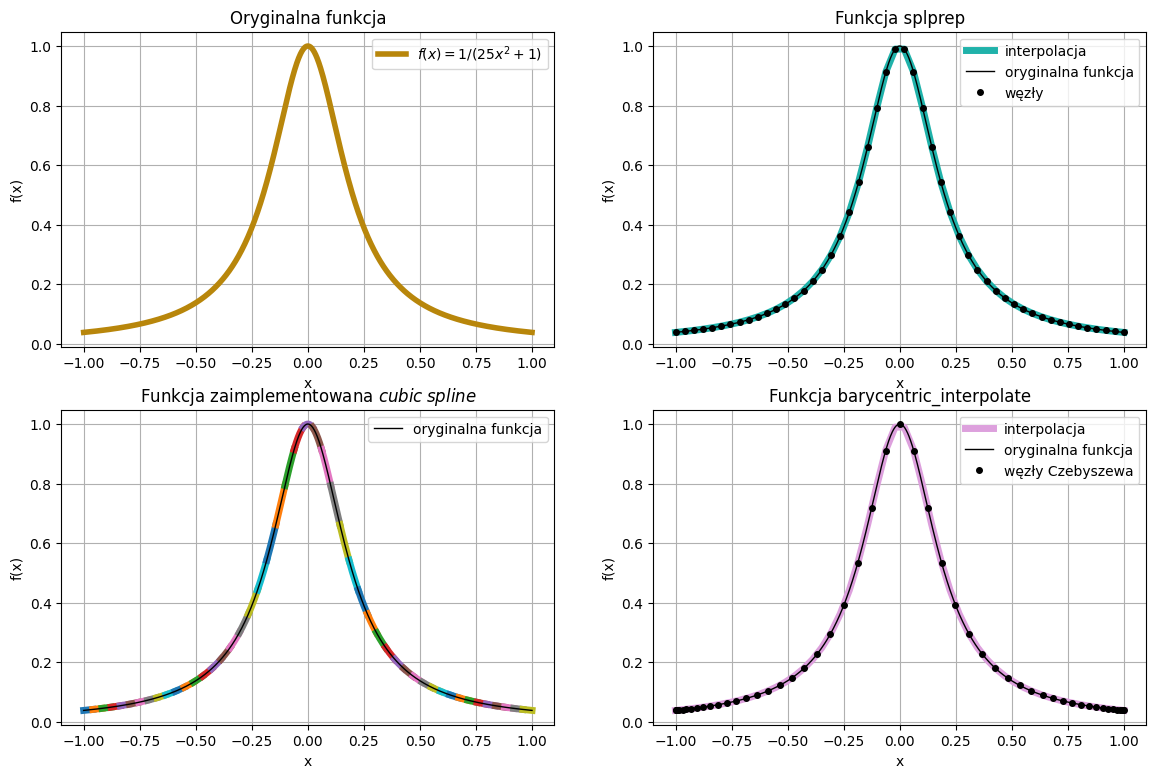

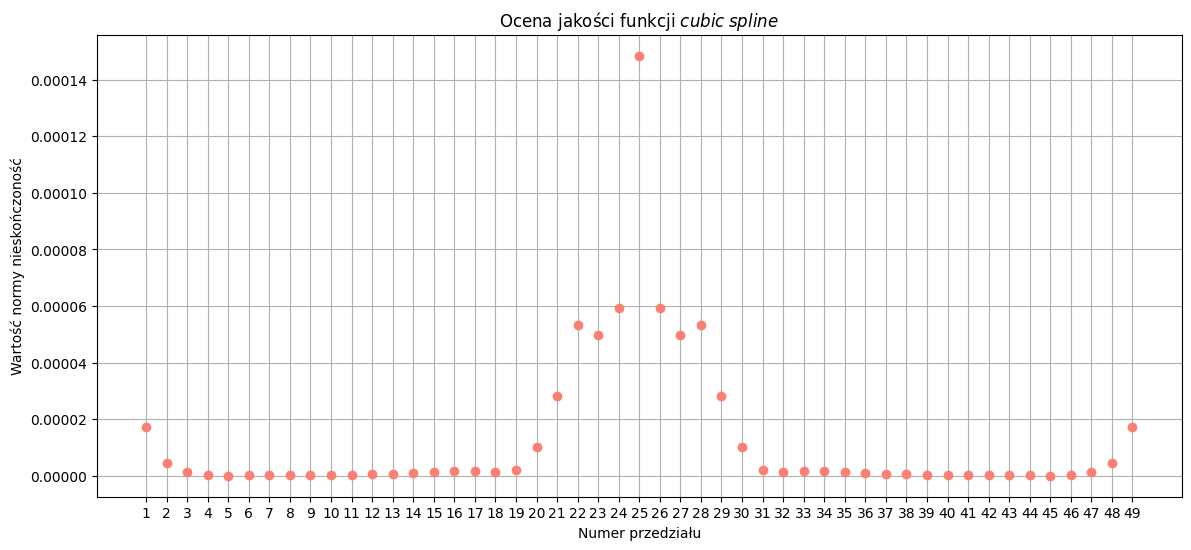

In [74]:
# funkcja oryginalna
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize= (14, 9))
fun = lambda x : 1/(25*x**2+1)
x = np.linspace(-1, 1, 1000)
y = fun(x)
ax1.plot(x, y,label= '$f(x) = 1/(25x^2+1)$', color= 'darkgoldenrod', linewidth= 4)
ax1.set(title= 'Oryginalna funkcja', xlabel= 'x', ylabel= 'f(x)')
ax1.legend()
ax1.grid()


# funkcja splprep
x_nodes1 = np.linspace(-1, 1, 50)
y_nodes1 = fun(x_nodes1)

tck, u = splprep([x_nodes1, y_nodes1], s= 0, k=1)
x_between1, y_between1 = splev(u, tck)
ax2.plot(x_between1, y_between1, color= 'lightseagreen', label= 'interpolacja', linewidth= 5)
ax2.plot(x, y,label= 'oryginalna funkcja', color= 'black', linewidth= 1)
ax2.plot(x_nodes1, y_nodes1,'.', markersize= 8,color= 'black', label= 'węzły')
ax2.set(title= 'Funkcja splprep', xlabel= 'x', ylabel= 'f(x)')
ax2.legend()
ax2.grid()


# zaimplementowana funkcja
x_nodes2 = np.linspace(-1, 1, 50)
y_nodes2 = fun(x_nodes2)

b, c, d=main.cubic_spline(x_nodes2,y_nodes2)
coeffs = [[b[i],c[i], d[i]] for i in range(len(b))]

norms_between2 = []
for i in range(len(x_nodes2)-1):
    x_between2 = np.linspace(x_nodes2[i], x_nodes2[i+1],1000)
    y_between2 = PolyCoefficients_cubic(x_between2, coeffs[i], x_nodes2[i], fun(x_nodes2[i]))
    ax3.plot(x_between2, y_between2, linewidth= 5)
    norms_between2.append(main.L_inf(fun(x_between2),y_between2))
ax3.plot(x, y,label= 'oryginalna funkcja', color= 'black', linewidth= 1)
ax3.set(title= 'Funkcja zaimplementowana $cubic_ spline$', xlabel= 'x', ylabel= 'f(x)')
ax3.grid()
ax3.legend()


# funkcja barycentric
x3 = np.linspace(-1, 1, 50)
interpolation_nodes_number = 50
x_nodes3 = main.chebyshev_nodes(interpolation_nodes_number)
y_values3 = barycentric_interpolate(x_nodes3, fun(x_nodes3), x3)
ax4.plot(x3, y_values3, color= 'plum', linewidth=5, label= 'interpolacja')
ax4.plot(x, y,label= 'oryginalna funkcja', color= 'black', linewidth= 1)
ax4.plot(x_nodes3, fun(x_nodes3), '.',markersize= 8, color= 'black', label= 'węzły Czebyszewa')
ax4.set(title= 'Funkcja barycentric_interpolate', xlabel= 'x', ylabel= 'f(x)')
ax4.legend()
ax4.grid()

# ocena jakości
intervals = [str(el) for el in range(1, 50)]
_, ax = plt.subplots(figsize= (14, 6))
ax.plot(intervals, norms_between2, 'o', color= 'salmon')
ax.set(title= 'Ocena jakości funkcji $cubic_ spline$', xlabel= 'Numer przedziału', ylabel= 'Wartość normy nieskończoność')
ax.grid()


***Wnioski:***

Tym razem jednym ze sposobów wykorzystanych do interpolacji była zaimplementowana funkcja *cubic_spline*, zamiast funkcji *first_spline*. Analiza wykresu błędu pozwoliła zauważyć, że rząd niedokładności otrzymanych wyników jest znacznie mniejszy. Maksymalny błąd okazał się ok. 70 razy mniejszy, niż w przypadku przybliżania funkcjami pierwszego rzędu. Błędy okazały się największe w miejscach "stromości" wykresu.  

***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


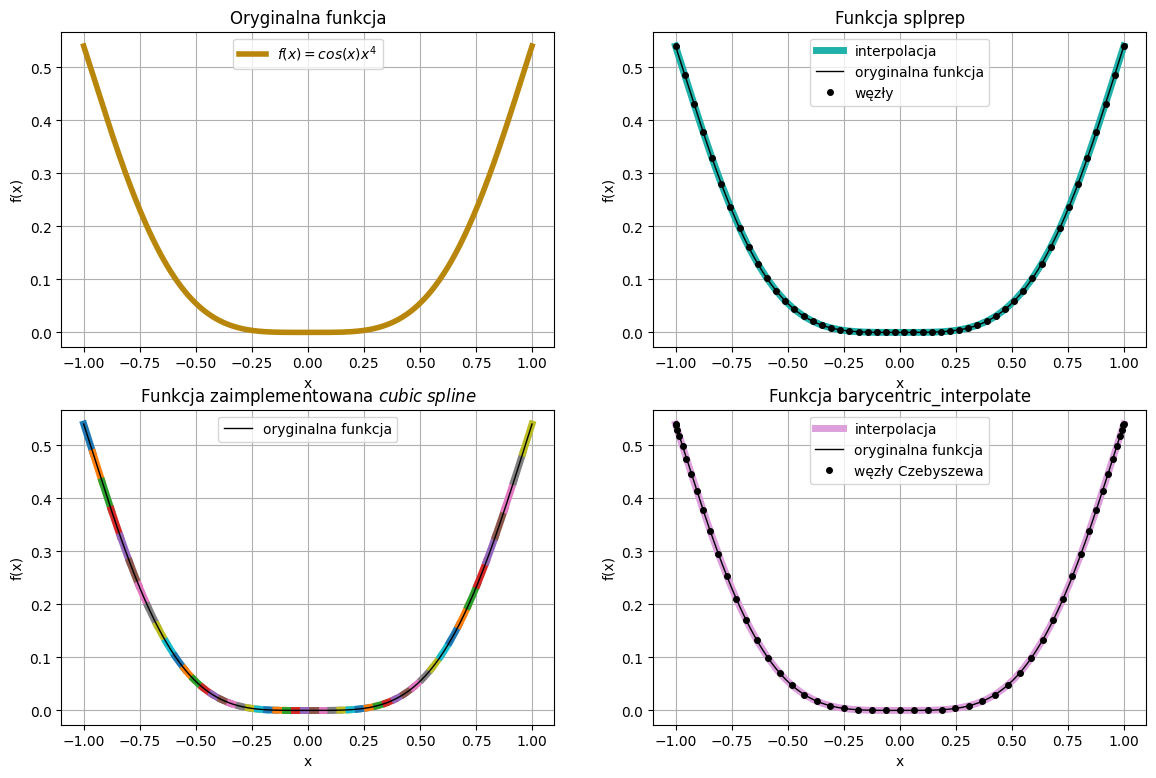

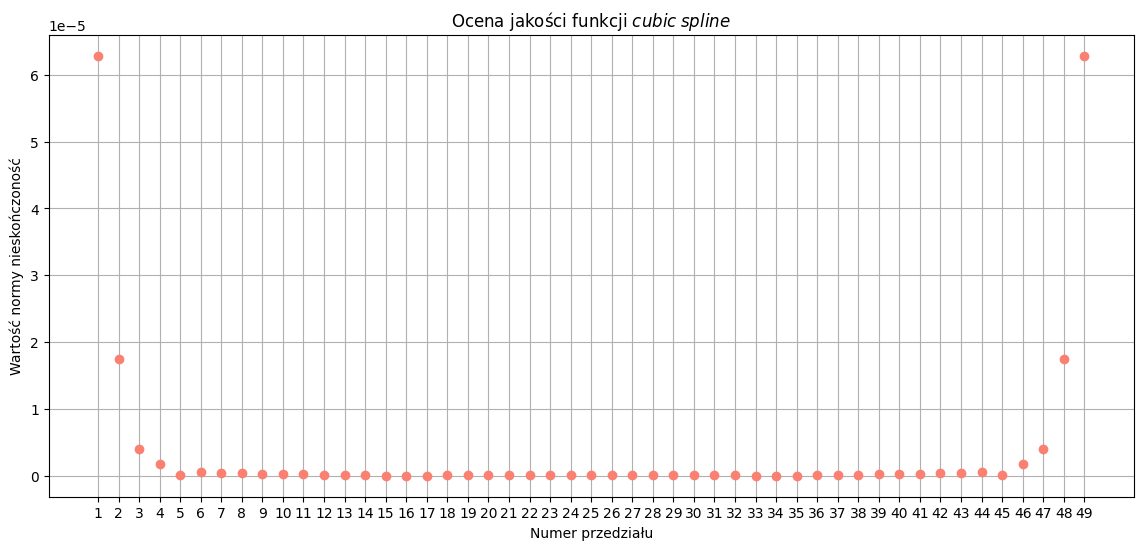

In [78]:
# funkcja oryginalna
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize= (14, 9))
fun = lambda x : np.cos(x)*x**4
x = np.linspace(-1, 1, 1000)
y = fun(x)
ax1.plot(x, y,label= '$f(x) = cos(x)x^4$', color= 'darkgoldenrod', linewidth= 4)
ax1.set(title= 'Oryginalna funkcja', xlabel= 'x', ylabel= 'f(x)')
ax1.legend()
ax1.grid()


# funkcja splprep
x_nodes1 = np.linspace(-1, 1, 50)
y_nodes1 = fun(x_nodes1)

tck, u = splprep([x_nodes1, y_nodes1], s= 0, k=1)
x_between1, y_between1 = splev(u, tck)
ax2.plot(x_between1, y_between1, color= 'lightseagreen', label= 'interpolacja', linewidth= 5)
ax2.plot(x, y,label= 'oryginalna funkcja', color= 'black', linewidth= 1)
ax2.plot(x_nodes1, y_nodes1,'.', markersize= 8,color= 'black', label= 'węzły')
ax2.set(title= 'Funkcja splprep', xlabel= 'x', ylabel= 'f(x)')
ax2.legend()
ax2.grid()

# zaimplementowana funkcja
x_nodes2 = np.linspace(-1, 1, 50)
y_nodes2 = fun(x_nodes2)

b, c, d=main.cubic_spline(x_nodes2,y_nodes2)
coeffs = [[b[i],c[i], d[i]] for i in range(len(b))]

norms_between2 = []
for i in range(len(x_nodes2)-1):
    x_between2 = np.linspace(x_nodes2[i], x_nodes2[i+1],1000)
    y_between2 = PolyCoefficients_cubic(x_between2, coeffs[i], x_nodes2[i], fun(x_nodes2[i]))
    ax3.plot(x_between2, y_between2, linewidth= 5)
    norms_between2.append(main.L_inf(fun(x_between2),y_between2))
ax3.plot(x, y,label= 'oryginalna funkcja', color= 'black', linewidth= 1)
ax3.set(title= 'Funkcja zaimplementowana $cubic_ spline$', xlabel= 'x', ylabel= 'f(x)')
ax3.grid()
ax3.legend()


# funkcja barycentric
x3 = np.linspace(-1, 1, 50)
interpolation_nodes_number = 50
x_nodes3 = main.chebyshev_nodes(interpolation_nodes_number)
y_values3 = barycentric_interpolate(x_nodes3, fun(x_nodes3), x3)
ax4.plot(x3, y_values3, color= 'plum', linewidth=5, label= 'interpolacja')
ax4.plot(x, y,label= 'oryginalna funkcja', color= 'black', linewidth= 1)
ax4.plot(x_nodes3, fun(x_nodes3), '.',markersize= 8, color= 'black', label= 'węzły Czebyszewa')
ax4.set(title= 'Funkcja barycentric_interpolate', xlabel= 'x', ylabel= 'f(x)')
ax4.legend()
ax4.grid()

# ocena jakości
intervals = [str(el) for el in range(1, 50)]
_, ax = plt.subplots(figsize= (14, 6))
ax.plot(intervals, norms_between2, 'o', color= 'salmon')
ax.set(title= 'Ocena jakości funkcji $cubic_ spline$', xlabel= 'Numer przedziału', ylabel= 'Wartość normy nieskończoność')
ax.grid()

***Wnioski:***

Podczas realizacji zadania szóstego postępowałam tak samo, jak w przypadku zadania szóstego. Tutaj błędy także okazały się znacznie mniejsze, niż w przypadku zastosowanie funkcji zaimplementowanej w zadaniu pierwszym. Jednocześnie, wartość normy była tym mniejsza, im krótsza była długość danego przedziału.

***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 oraz przedstawić wyniki na odpowiednich wykresach.

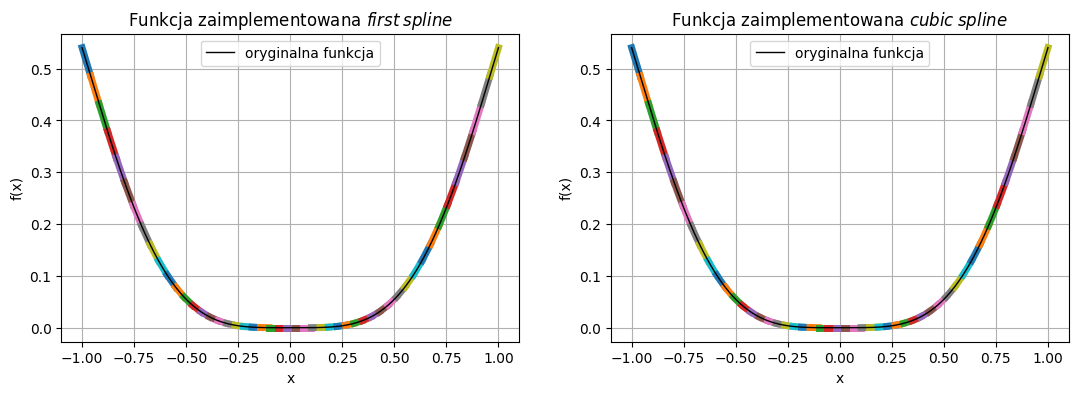

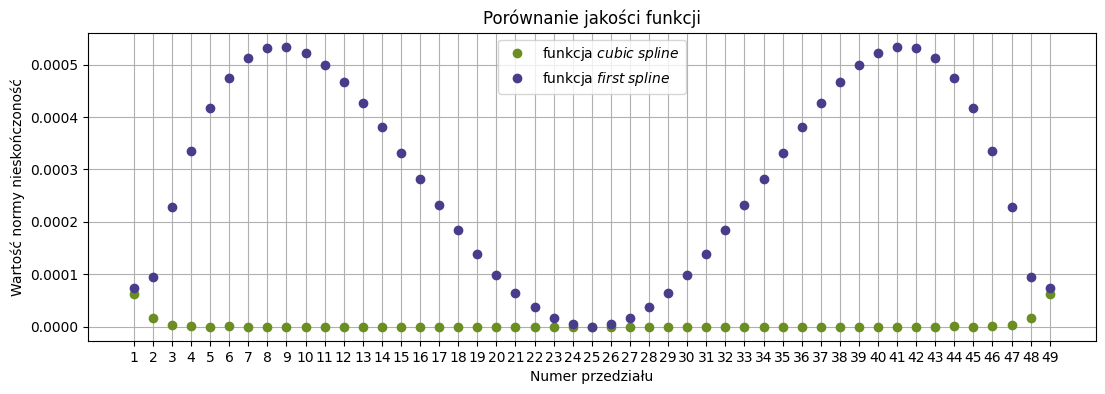

In [88]:
# funkcja oryginalna
fig, (ax2, ax3) = plt.subplots(1, 2, figsize= (13, 4))
fun = lambda x : np.cos(x)*x**4
x = np.linspace(-1, 1, 1000)
y = fun(x)

# zaimplementowana funkcja 1
x_nodes1 = np.linspace(-1, 1, 50)
y_nodes1 = fun(x_nodes1)

a,b=main.first_spline(x_nodes1,y_nodes1)
coeffs1 = [[b[i],a[i]] for i in range(len(a))]

norms_between1 = []
for i in range(len(x_nodes1)-1):
    x_between1 = np.linspace(x_nodes1[i], x_nodes1[i+1],1000)
    y_between1 = PolyCoefficients(x_between1, coeffs1[i])
    ax2.plot(x_between1, y_between1, linewidth= 5)
    norms_between1.append(main.L_inf(fun(x_between1),y_between1))
ax2.plot(x, y,label= 'oryginalna funkcja', color= 'black', linewidth= 1)
ax2.set(title= 'Funkcja zaimplementowana $first_ spline$', xlabel= 'x', ylabel= 'f(x)')
ax2.grid()
ax2.legend()

# zaimplementowana funkcja 2
x_nodes2 = np.linspace(-1, 1, 50)
y_nodes2 = fun(x_nodes2)

b, c, d=main.cubic_spline(x_nodes2,y_nodes2)
coeffs = [[b[i],c[i], d[i]] for i in range(len(b))]

norms_between2 = []
for i in range(len(x_nodes2)-1):
    x_between2 = np.linspace(x_nodes2[i], x_nodes2[i+1],1000)
    y_between2 = PolyCoefficients_cubic(x_between2, coeffs[i], x_nodes2[i], fun(x_nodes2[i]))
    ax3.plot(x_between2, y_between2, linewidth= 5)
    norms_between2.append(main.L_inf(fun(x_between2),y_between2))
ax3.plot(x, y,label= 'oryginalna funkcja', color= 'black', linewidth= 1)
ax3.set(title= 'Funkcja zaimplementowana $cubic_ spline$', xlabel= 'x', ylabel= 'f(x)')
ax3.grid()
ax3.legend()

# ocena jakości
intervals = [str(el) for el in range(1, 50)]
_, (ax) = plt.subplots(figsize= (13, 4))
ax.plot(intervals, norms_between2, 'o', color= 'olivedrab', label= 'funkcja $cubic_ spline$')
ax.plot(intervals, norms_between1, 'o', color= 'darkslateblue', label= 'funkcja $first_ spline$')
ax.set(title= 'Porównanie jakości funkcji', xlabel= 'Numer przedziału', ylabel= 'Wartość normy nieskończoność')
ax.grid()
ax.legend()

***Wnioski:***

W ostatnim zadaniu naszym celem było porównanie działania obu zaimplementowanych funkcji - *first_spline* oraz *cubic_spline*. Na podstawie powyższych wykresów możemy zauważyć, że oba sposoby skutecznie przybliżają funkcję na podstawie wartości funkcji w zadanych węzłach. Jednakże, przybliżenie analizowanej funkcji jest znacznie dokładniejsze w przypadku funkcji *cubic_spline*.